In [7]:
#importo le librerie necessarie 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import pickle


#importo i csv e li inseriesco all'interno di due variabili
red_wine = pd.read_csv("https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/wine_quality/winequality-red.csv", sep=';')
white_wine = pd.read_csv("https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/wine_quality/winequality-white.csv", sep=';')

#aggiungo una colonna per entrambi i csv per riconoscere tra vini bianchi e rossi 
red_wine.insert(0, 'type', 0)
white_wine.insert(0, 'type', 1)

#unisco i csv in un unico dataframe
df_wine = pd.concat([red_wine, white_wine], ignore_index=True)

#stampo la variabile wine per assicurarmi che l'importo sia andato a buon fine
display(df_wine)

#rinomino le colonne
df_wine.columns = ('type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality')

 

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,1,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,1,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,1,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


1 Fixed acidity. The predominant fixed acids in wine, such as tartaric, succinic, citric, and malic acids. 2 Volatile acidity. The high acetic acid present in wine, which causes an unpleasant vinegar taste. 3 Citric acid. A weak organic acid used to increase the freshness and flavor of wine. 4 Residual sugar. The amount of sugar left after fermentation. 5 Chlorides. The amount of salt in wine. The lower chloride rate creates better quality wines. 6 Free sulfur dioxide. SO2 is used for preventing wine from oxidation and microbial spoilage. 7 Total sulfur dioxide. The amount of free and bound forms of SO2. 8 Density. Depends on the alcohol and sugar content. Better wines usually have lower densities. 9 pH. Used to check the level of acidity or alkalinity of wine. 10 Sulfates. An antibacterial and antioxidant agent added to wine. 11 Alcohol. The percentage of alcohol in wine. A higher concentration leads to better quality. 12 Type. 0 Red wine, 1 White wine.

In [8]:
#controllo i valori nulli
df_wine.isnull().sum()

type                    0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

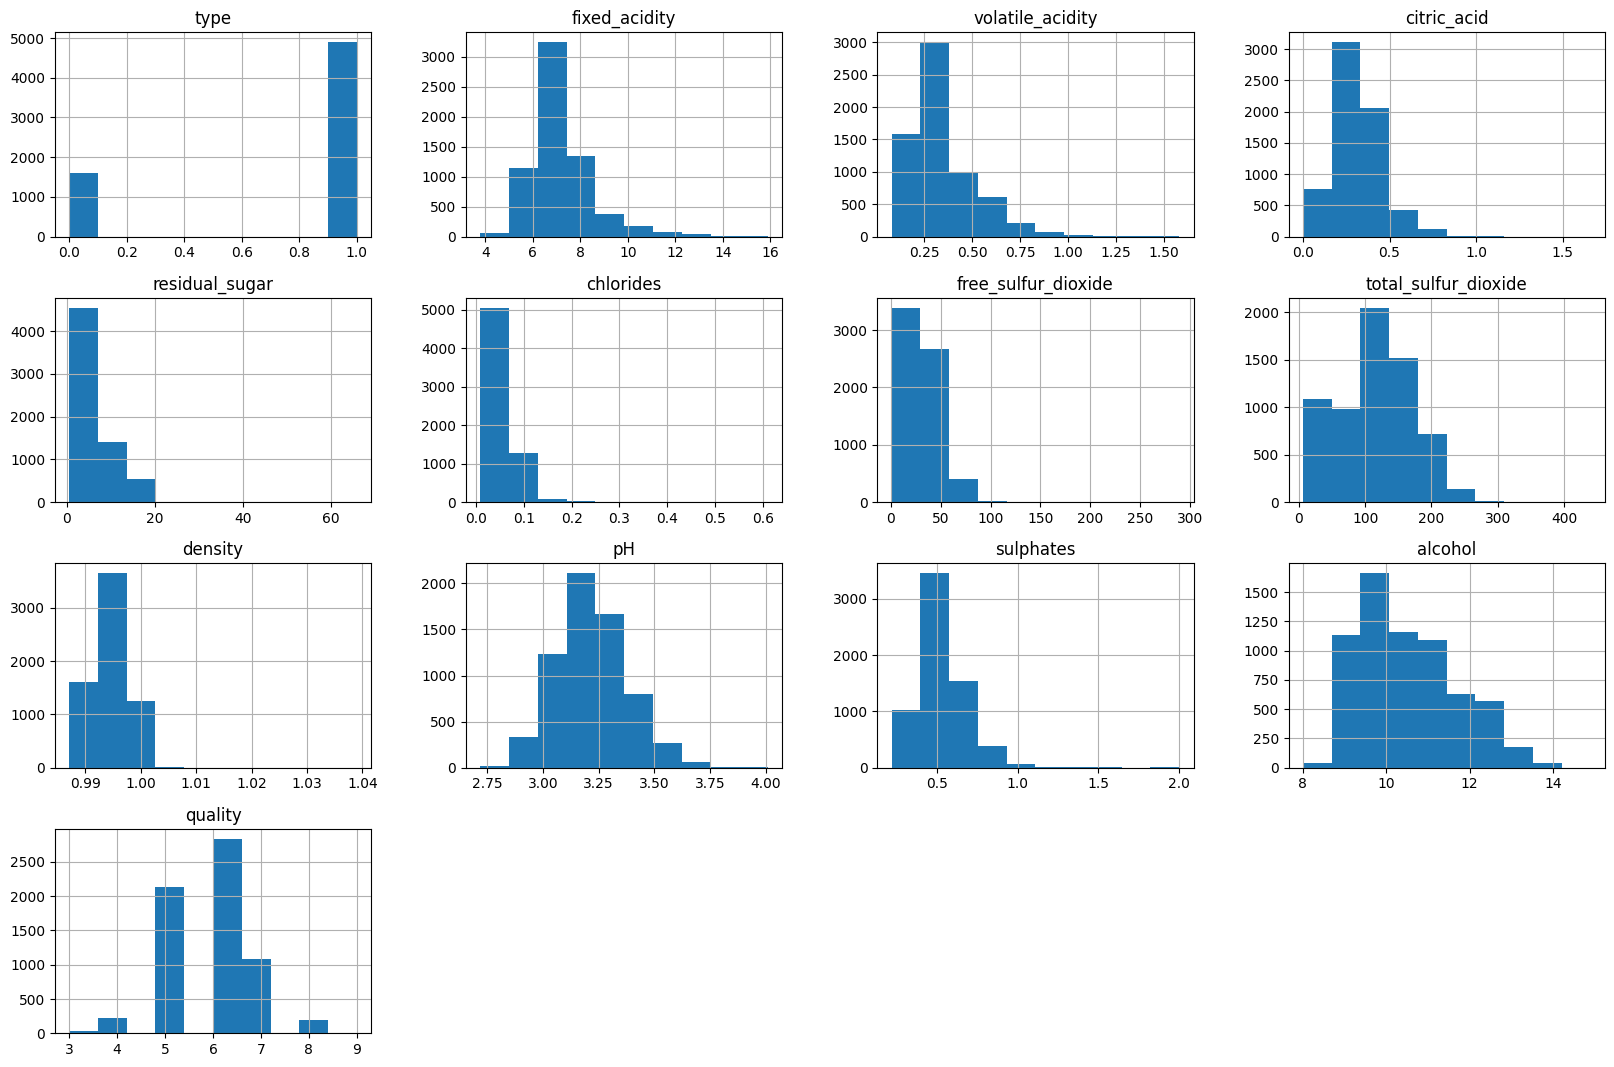

In [9]:
#visualizzo in tabelle ogni colonna del dataframe
df_wine.hist(figsize=(20,13))
plt.show()

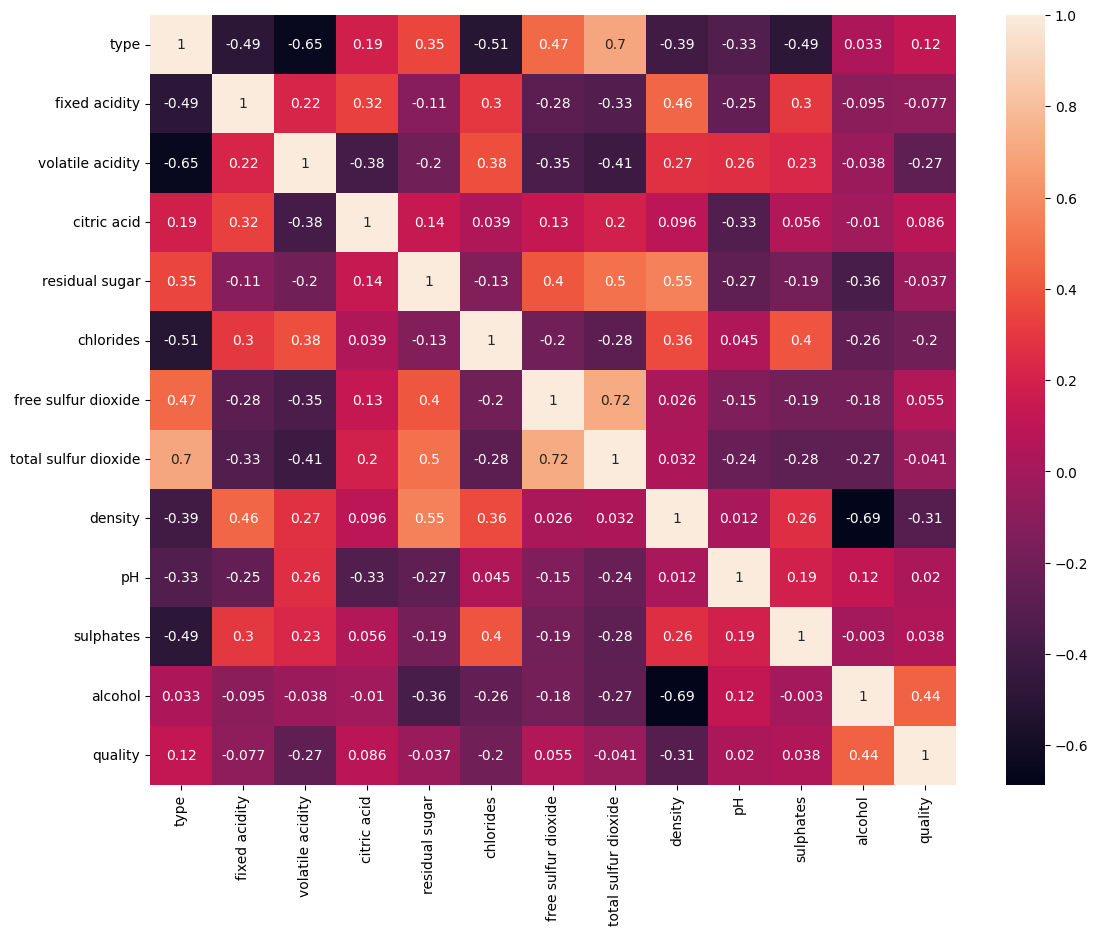

In [5]:
#heatmap correlazioni
plt.figure(figsize=(13, 10))
corr_matrix = df_wine.corr(numeric_only = True)

sns.heatmap(corr_matrix, annot=True)
plt.show()

Dal grafico si può notare una correlazione tra free_sulfur_dioxite e total_sulfur_dioxite, decido di eliminare total_sulfur_dioxite

In [10]:
#elimino dalla tabella la colonna total_sulfur_dioxide
df_wine=df_wine.drop("total_sulfur_dioxide", axis=1)

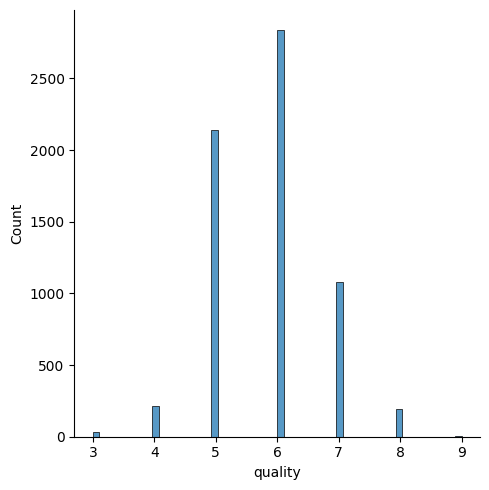

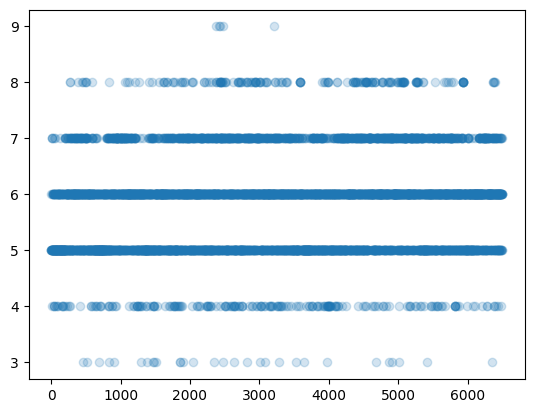

In [11]:
#grafico che conta i vini in base alla qualità

df_temp=df_wine['quality']
sns.displot(df_temp)
plt.show()

temp=df_temp.to_numpy()

plt.scatter(np.arange(temp.size), temp, alpha=0.2)
plt.show()

In [12]:
corr_labels = corr_matrix['quality'].sort_values(ascending=False)
print(corr_labels)

quality                 1.000000
alcohol                 0.444319
type                    0.119323
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


In [13]:
#ho creato una nuova colonna top quality assegna il valore 1 se la quality del vino è > 5 o il valore 0 se inferiore di 5
df_wine['top_quality'] = [1 if x > 5.8 else 0 for x in df_wine.quality]
display(df_wine)

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol,quality,top_quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0
1,0,7.8,0.88,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5,0
2,0,7.8,0.76,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5,0
3,0,11.2,0.28,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6,1
4,0,7.4,0.70,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.21,0.29,1.6,0.039,24.0,0.99114,3.27,0.50,11.2,6,1
6493,1,6.6,0.32,0.36,8.0,0.047,57.0,0.99490,3.15,0.46,9.6,5,0
6494,1,6.5,0.24,0.19,1.2,0.041,30.0,0.99254,2.99,0.46,9.4,6,1
6495,1,5.5,0.29,0.30,1.1,0.022,20.0,0.98869,3.34,0.38,12.8,7,1


In [27]:
df_wine.columns = ('tow', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'top_quality')


In [14]:
#selezione delle features e della colonna target
features = df_wine.drop(['quality', 'top_quality'], axis=1)
target = df_wine['top_quality']

#split di training e testing delle features e del target
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=40)

#shape delle tuple di training e di testing
x_train.shape, x_test.shape

((5197, 11), (1300, 11))

In [29]:
# Normalizzazione dei valori
from sklearn.preprocessing import MinMaxScaler


norm = MinMaxScaler()
xtrain = norm.fit_transform(x_train)
xtest = norm.transform(x_test)
print(xtrain)
print(xtest)

[[0.         0.29166667 0.29333333 ... 0.54330709 0.20786517 0.4057971 ]
 [1.         0.3        0.1        ... 0.31496063 0.04494382 0.44927536]
 [1.         0.29166667 0.13333333 ... 0.2992126  0.14606742 0.33333333]
 ...
 [1.         0.20833333 0.31333333 ... 0.37795276 0.28651685 0.73913043]
 [1.         0.16666667 0.12       ... 0.39370079 0.10674157 0.49275362]
 [1.         0.20833333 0.12       ... 0.51181102 0.20224719 0.27536232]]
[[1.02229367e-04 4.51367005e-01 1.27711990e-01 ... 3.58942623e-01
  5.08111661e-01 5.61891677e-01]
 [1.00003338e+00 2.46042899e-01 1.41098021e-01 ... 2.75482378e-01
  1.42710855e-01 6.04432213e-01]
 [1.00003338e+00 3.17116628e-01 2.74958332e-01 ... 3.89291803e-01
  1.03956224e-01 5.61891677e-01]
 ...
 [1.00003338e+00 2.38145818e-01 1.54484053e-01 ... 3.36180738e-01
  1.26101727e-01 1.93207035e-01]
 [1.00003338e+00 2.46042899e-01 2.06237416e-02 ... 3.58942623e-01
  8.73470965e-02 2.64107928e-01]
 [1.02229367e-04 4.03984519e-01 3.55274519e-01 ... 3.741

In [32]:
#inizializzazione del modello di regressione logistica e importo le tabelle che mi servono per questo blocco
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


logistic_model = LogisticRegression()

#training del modello
logistic_model.fit(xtrain, y_train)

#previsionI sui test
y_pred_logistic = logistic_model.predict(xtest)


#inizializzazione della matrice di confusione
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

#definizione dell'errore quadrato medio
mse = mean_squared_error(y_test, y_pred_logistic)
print('MSE:', mse)

#definizione di r2
r2 = r2_score(y_test, y_pred_logistic)
print('R2:', r2)

MSE: 0.26692307692307693
R2: -0.18819652786374852


In [ ]:
#salvo il modello in questa cartella grazie alla libreria pickle

pickle.dump(logistic_model,open("training.pkl","wb"))
model = pickle.load(open("training.pkl", "rb"))